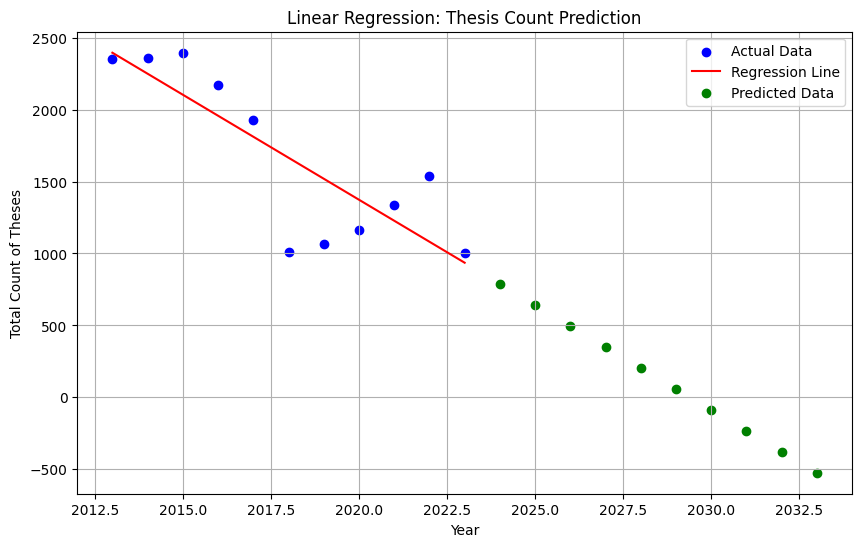

ModuleNotFoundError: No module named 'ace_tools'

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/HP/Desktop/CEDT_Year2/DSDE/Project/DSDE_Project/5_merge/complete_data.csv'
data = pd.read_csv(file_path)

# Summarize the data by year
data_summary = data.groupby('Year')['Count'].sum().reset_index()

# Prepare data for linear regression
X = data_summary['Year'].values.reshape(-1, 1)
y = data_summary['Count'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future values
future_years = np.arange(data_summary['Year'].max() + 1, data_summary['Year'].max() + 11).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(future_years, future_predictions, color='green', label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Total Count of Theses')
plt.title('Linear Regression: Thesis Count Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Combine the predictions with years for display
future_data = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Count': future_predictions
})

# Display the predictions
import ace_tools as tools; tools.display_dataframe_to_user(name="Predicted Thesis Count", dataframe=future_data)
